# Passengers and Fuel Consumption

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [320]:
import pandas as pd
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import scipy.stats as st
import statsmodels.api as sm

In [289]:
df_flights_cleaned = pd.read_csv('flights_cleaned.csv', index_col=False)

In [290]:
df_flights_cleaned.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",1100,1138.0,...,51.0,80,93.0,68.0,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303.0,...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",2130,2159.0,...,18.0,75,64.0,55.0,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833.0,...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353.0,...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0


In [291]:
df_flights_cleaned.columns

Index(['fl_date', 'mkt_unique_carrier', 'op_unique_carrier',
       'op_carrier_fl_num', 'origin', 'origin_city_name', 'dest',
       'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [292]:
# convert to datetime 

df_flights_cleaned['fl_date'] = pd.to_datetime(df_flights_cleaned['fl_date'], format='%Y-%m-%d', errors='ignore')

In [293]:
# create new column 'fl_month'
# extract month
df_flights_cleaned['fl_year'] = df_flights_cleaned['fl_date'].dt.year
df_flights_cleaned['fl_month'] = df_flights_cleaned['fl_date'].dt.month

# shift column position 
fl_year = df_flights_cleaned.pop('fl_year')
fl_month = df_flights_cleaned.pop('fl_month')

#insert col using insert 
df_flights_cleaned.insert(1, 'fl_month', fl_month)
df_flights_cleaned.insert(1, 'fl_year', fl_year)

df_flights_cleaned.head()

,fl_date,fl_year,fl_month,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,2018,5,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",...,51.0,80,93.0,68.0,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,2019,4,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,2019,2,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",...,18.0,75,64.0,55.0,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,2018,11,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,2018,8,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0


In [323]:
df_flights_cleaned.dtypes

fl_date                datetime64[ns]
fl_year                         int64
fl_month                        int64
mkt_unique_carrier             object
op_unique_carrier              object
op_carrier_fl_num               int64
origin                         object
origin_city_name               object
dest                           object
dest_city_name                 object
crs_dep_time                    int64
dep_time                      float64
dep_delay                     float64
taxi_out                      float64
taxi_in                       float64
crs_arr_time                    int64
arr_time                      float64
arr_delay                     float64
crs_elapsed_time                int64
actual_elapsed_time           float64
air_time                      float64
distance                        int64
carrier_delay                 float64
weather_delay                 float64
nas_delay                     float64
security_delay                float64
late_aircraf

In [ ]:
# outliers?

## 1. Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [ ]:
df_flights_cleaned['op_unique_carrier'].value_counts()

WN    33505
DL    24477
AA    22807
OO    19948
UA    15388
YX     7800
MQ     7492
B6     7362
OH     7029
AS     6414
9E     6102
YV     5344
NK     4763
EV     4069
F9     3062
QX     2854
PT     2586
G4     2518
ZW     2416
CP     2393
HA     2084
G7     2070
AX     1990
C5     1233
EM      225
VX      224
KS       25
9K       13
Name: op_unique_carrier, dtype: int64

In [342]:
# create value_counts dataframe; want count of flights; op_unique_carrier is the unique flight carrier
df_flight_count = df_flights_cleaned['op_unique_carrier'].value_counts().rename_axis('op_unique_carrier').reset_index(name='flight_count')
df_flight_count

,op_unique_carrier,flight_count
0,WN,33505
1,DL,24477
2,AA,22807
3,OO,19948
4,UA,15388
5,YX,7800
6,MQ,7492
7,B6,7362
8,OH,7029
9,AS,6414


In [295]:
# df for op_unique_carrier with selected columns
# groupby op_unique_carrier and month, get sum of all delay for each month

df_monthly_delay_op = df_flights_cleaned[['fl_month', 'op_unique_carrier', 'arr_delay']]

df_monthly_delay_op = df_monthly_delay_op.groupby(['op_unique_carrier', 'fl_month']).sum().reset_index() #reset index back to default for each row
df_monthly_delay_op = df_monthly_delay_op.groupby('op_unique_carrier').mean().reset_index()
df_monthly_delay_op.drop(columns=['fl_month'], inplace=True)

# merge df
df_monthly_delay_op = df_monthly_delay_op.merge(df_flight_count, how='left', on='op_unique_carrier')
df_monthly_delay_op

,op_unique_carrier,arr_delay,flight_count
0,9E,1505.500000,6102
1,9K,-18.750000,13
2,AA,12662.833333,22807
3,AS,85.750000,6414
4,AX,2445.000000,1990
5,B6,7797.416667,7362
6,C5,2796.333333,1233
7,CP,831.500000,2393
8,DL,370.083333,24477
9,EM,54.166667,225


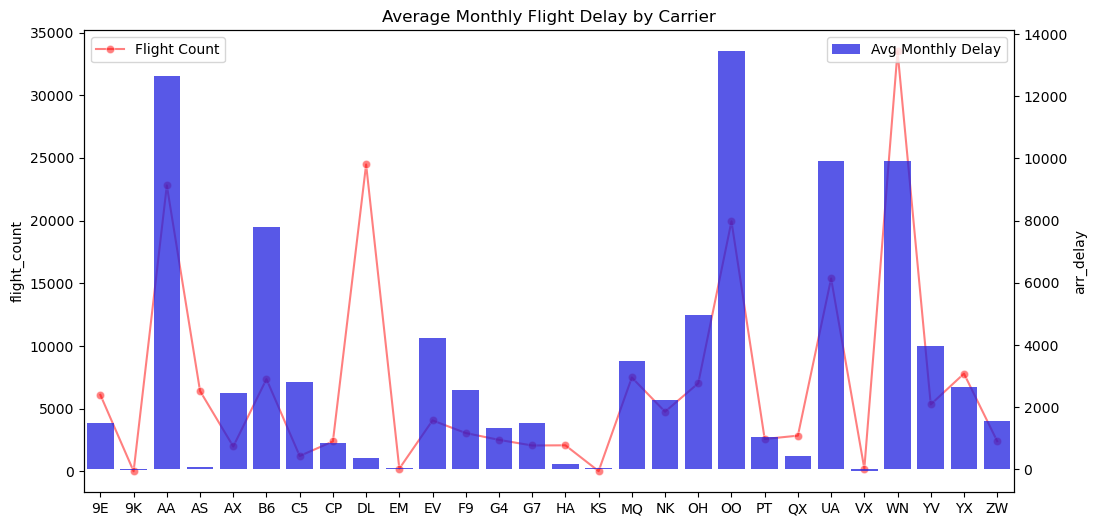

In [296]:

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = df_monthly_delay_op['flight_count'], marker='o', sort = False, color = 'r', ax=ax1, alpha=0.5, label="Flight Count")
ax2 = ax1.twinx()

graph = sns.barplot(data = df_monthly_delay_op, x='op_unique_carrier', y='arr_delay', alpha=0.75, ax=ax2, color = 'b', label='Avg Monthly Delay')
graph.set(xlabel = "Flight Carrier", title ='Average Monthly Flight Delay by Carrier')

ax1.legend()
ax2.legend()

Generally, the more flights, the higher the monthly arrival delay, with the exception of DL (delta air lines)

In [297]:
df_flights_cleaned.mkt_unique_carrier.unique()

array(['WN', 'AA', 'DL', 'UA', 'AS', 'B6', 'F9', 'NK', 'G4', 'HA', 'VX'],
      dtype=object)

In [298]:
df_flights_cleaned.op_unique_carrier.nunique()

28

## 2. Find out distance covered monthly by different air carriers

In [316]:
# groupby op_unique_carrier and month, get total distance travelled for each month per flight carrier

df_avg_month_dist = df_flights_cleaned[['fl_month', 'op_unique_carrier', 'distance']]

df_avg_month_dist = df_avg_month_dist.groupby(['op_unique_carrier', 'fl_month']).sum().reset_index() #reset index back to default for each row
df_avg_month_dist = df_avg_month_dist.groupby('op_unique_carrier').mean().reset_index()
df_avg_month_dist.drop(columns=['fl_month'], inplace=True)
df_avg_month_dist.head()

,op_unique_carrier,distance
0,9E,2.364680e+05
1,9K,3.462500e+02
2,AA,1.896168e+06
3,AS,6.959782e+05
4,AX,7.664600e+04


## 3. Find out number of passengers that were carried by different air carriers

In [300]:
passengers = pd.read_csv('passengers.csv')

In [301]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   departures_scheduled   200000 non-null  int64 
 1   departures_performed   200000 non-null  int64 
 2   payload                200000 non-null  int64 
 3   seats                  200000 non-null  int64 
 4   passengers             200000 non-null  int64 
 5   freight                200000 non-null  int64 
 6   mail                   200000 non-null  int64 
 7   distance               200000 non-null  int64 
 8   ramp_to_ramp           200000 non-null  int64 
 9   air_time               200000 non-null  int64 
 10  unique_carrier         200000 non-null  object
 11  airline_id             200000 non-null  int64 
 12  unique_carrier_name    200000 non-null  object
 13  region                 200000 non-null  object
 14  carrier                200000 non-null  object
 15  

In [302]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0,17,37400,136,43,4,0,57,423,321,...,US,United States,1,194,1,2016,8,1,F,DU
1,62,93,4140480,16833,15507,144102,0,1721,21916,19424,...,US,United States,6,634,1,2015,5,4,F,DU
2,27,20,244800,1000,752,0,0,198,1219,817,...,US,United States,6,629,1,2015,12,1,F,DU
3,0,1,33630,126,120,0,0,825,156,126,...,US,United States,6,612,1,2015,1,2,L,DU
4,0,1,75830,179,145,0,0,483,77,67,...,US,United States,6,617,1,2017,3,1,L,DU


In [328]:
# passengers.nunique()

In [331]:
# passengers.isnull().sum()

In [334]:
# passengers.duplicated()

In [303]:
df_monthly_pass = passengers[['month', 'unique_carrier', 'passengers']]
df_monthly_pass = df_monthly_pass.groupby(['month', 'unique_carrier']).sum().reset_index() #reset index back to default for each row
df_monthly_pass = df_monthly_pass.groupby('unique_carrier').mean().reset_index()
df_monthly_pass.drop(columns=['month'], inplace=True)
df_monthly_pass

# add unique carrier name


,unique_carrier,passengers
0,02Q,124.000000
1,04Q,1483.000000
2,07Q,936.000000
3,09Q,18896.583333
4,0BQ,6.666667
...,...,...
360,Z3Q,802.100000
361,ZE,4772.000000
362,ZK,2151.500000
363,ZW,163284.750000


## 4. Find out total fuel comsumption per air carrier.

In [304]:
df_fuel = pd.read_csv('fuel_comsumption.csv')

In [305]:
df_fuel.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,6,20398.0,MQ,MQ,Envoy Air,3,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2018
1,7,20149.0,PRQ,PRQ,Florida West Airlines Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2015
2,12,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2017
3,9,20377.0,X9,X9,Omni Air International LLC,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,778134,4636575.0,5414709,2017
4,2,19917.0,5X,5X,United Parcel Service,3,31215000.0,8565000.0,12080000.0,2887000.0,...,50872000,12045000.0,19250000.0,5036000.0,36331000.0,87203000,50872000,36331000.0,87203000,2017


In [336]:
df_fuel.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [339]:
# df_fuel.info()

In [306]:
df_carrier_fuel = df_fuel[['unique_carrier','tdomt_gallons']]

df_carrier_fuel = df_carrier_fuel.groupby(['unique_carrier']).sum().reset_index() #reset index back to default for each row
df_carrier_fuel

,unique_carrier,tdomt_gallons
0,09Q,17720335.0
1,0JQ,596932.0
2,0WQ,2691927.0
3,1BQ,1442038.0
4,23Q,60508.0
...,...,...
57,X9,23405141.0
58,XP,8609988.0
59,YV,0.0
60,YX,287094151.0


### Use this information to get the average fuel comsumption per passenger per km. 
### Is this higher for the airlines with bigger average delays?

In [307]:
df_avg_fuel = pd.DataFrame()
df_avg_fuel = df_monthly_pass.merge(df_carrier_fuel, how='left', on='unique_carrier')
df_avg_fuel = df_avg_fuel.merge(df_avg_month_dist, how='left', left_on='unique_carrier', right_on='op_unique_carrier')
df_avg_fuel.drop(columns=['op_unique_carrier'], inplace=True)
df_avg_fuel = df_avg_fuel.merge(df_monthly_delay_op, how='left', left_on='unique_carrier', right_on='op_unique_carrier')
df_avg_fuel

,unique_carrier,passengers,tdomt_gallons,distance,op_unique_carrier,arr_delay,flight_count
0,02Q,124.000000,NaN,NaN,NaN,NaN,NaN
1,04Q,1483.000000,NaN,NaN,NaN,NaN,NaN
2,07Q,936.000000,NaN,NaN,NaN,NaN,NaN
3,09Q,18896.583333,17720335.0,NaN,NaN,NaN,NaN
4,0BQ,6.666667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
360,Z3Q,802.100000,NaN,NaN,NaN,NaN,NaN
361,ZE,4772.000000,NaN,NaN,NaN,NaN,NaN
362,ZK,2151.500000,NaN,NaN,NaN,NaN,NaN
363,ZW,163284.750000,130683426.0,73633.333333,ZW,1556.416667,2416.0


In [308]:
# drop NA
df_avg_fuel.dropna(inplace=True)
df_avg_fuel.drop(columns=['unique_carrier'], inplace=True)
df_avg_fuel.shape

(22, 6)

In [309]:
df_avg_fuel

,passengers,tdomt_gallons,distance,op_unique_carrier,arr_delay,flight_count
95,4.560208e+05,0.000000e+00,2.364680e+05,9E,1505.500000,6102.0
102,5.125419e+06,1.005715e+10,1.896168e+06,AA,12662.833333,22807.0
117,1.028258e+06,2.628731e+09,6.959782e+05,AS,85.750000,6414.0
124,1.379985e+06,3.034503e+09,6.741768e+05,B6,7797.416667,7362.0
142,2.232668e+05,0.000000e+00,1.085597e+05,CP,831.500000,2393.0
152,5.189726e+06,9.506876e+09,1.827983e+06,DL,370.083333,24477.0
163,5.479581e+05,2.678243e+06,1.571154e+05,EV,4229.250000,4069.0
166,6.348597e+05,1.034765e+09,2.656429e+05,F9,2555.333333,3062.0
174,4.362401e+05,8.468571e+08,1.831488e+05,G4,1335.583333,2518.0
175,1.901011e+05,0.000000e+00,8.752050e+04,G7,1480.000000,2070.0


In [310]:
# convert miles to km
conversion_factor = 0.62137119

df_avg_fuel['distance'] = df_avg_fuel['distance'] / conversion_factor

In [311]:
df_avg_fuel.head()

,passengers,tdomt_gallons,distance,op_unique_carrier,arr_delay,flight_count
95,4.560208e+05,0.000000e+00,3.805584e+05,9E,1505.500000,6102.0
102,5.125419e+06,1.005715e+10,3.051586e+06,AA,12662.833333,22807.0
117,1.028258e+06,2.628731e+09,1.120068e+06,AS,85.750000,6414.0
124,1.379985e+06,3.034503e+09,1.084982e+06,B6,7797.416667,7362.0
142,2.232668e+05,0.000000e+00,1.747098e+05,CP,831.500000,2393.0


In [324]:
# total fuel per passengers per distance(km)

df_avg_fuel['avg_fuel_pass_km'] = df_avg_fuel['tdomt_gallons'] / df_avg_fuel['passengers'] / df_avg_fuel['distance']
df_avg_fuel.head()

,passengers,tdomt_gallons,distance,op_unique_carrier,arr_delay,flight_count,avg_fuel_pass_km
95,4.560208e+05,0.000000e+00,3.805584e+05,9E,1505.500000,6102.0,0.000000
102,5.125419e+06,1.005715e+10,3.051586e+06,AA,12662.833333,22807.0,0.000643
117,1.028258e+06,2.628731e+09,1.120068e+06,AS,85.750000,6414.0,0.002282
124,1.379985e+06,3.034503e+09,1.084982e+06,B6,7797.416667,7362.0,0.002027
142,2.232668e+05,0.000000e+00,1.747098e+05,CP,831.500000,2393.0,0.000000


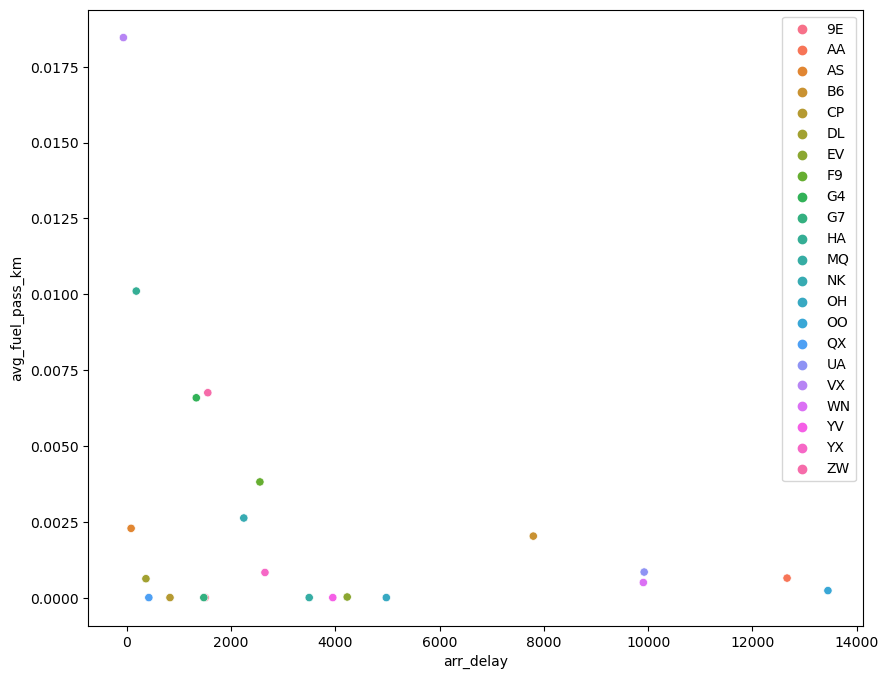

In [313]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_avg_fuel, x="arr_delay", y="avg_fuel_pass_km", hue='op_unique_carrier')
plt.legend(loc='upper right')

# # add annotations one by one with a loop
# for line in range(0,df_avg_fuel.shape[0]):
#     print(line)
#     plt.text(df_avg_fuel.arr_delay[line]+0.2, df_avg_fuel.avg_fuel_pass_km[line], df_avg_fuel.op_unique_carrier[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.show()

Airline carriers UA, WN, AA and OO have an average of over 8000 mins arrival delay per month.

In [314]:
df_avg_fuel.corr()

,passengers,tdomt_gallons,distance,arr_delay,flight_count,avg_fuel_pass_km
passengers,1.000000,0.981820,0.986977,0.561138,0.921456,-0.247784
tdomt_gallons,0.981820,1.000000,0.968056,0.494842,0.841913,-0.162918
distance,0.986977,0.968056,1.000000,0.623219,0.939653,-0.275659
arr_delay,0.561138,0.494842,0.623219,1.000000,0.685645,-0.358411
flight_count,0.921456,0.841913,0.939653,0.685645,1.000000,-0.365849
avg_fuel_pass_km,-0.247784,-0.162918,-0.275659,-0.358411,-0.365849,1.000000


In [318]:
df_avg_fuel.describe()

,passengers,tdomt_gallons,distance,arr_delay,flight_count,avg_fuel_pass_km
count,2.200000e+01,2.200000e+01,2.200000e+01,22.000000,22.000000,22.000000
mean,1.350192e+06,2.179170e+09,9.139192e+05,3889.393939,8641.863636,0.002561
std,1.784629e+06,3.497493e+09,1.046061e+06,4167.127276,8849.093122,0.004477
min,1.632848e+05,0.000000e+00,1.185014e+05,-62.000000,224.000000,0.000000
25%,4.106386e+05,0.000000e+00,2.171992e+05,957.520833,2602.000000,0.000000
50%,5.209937e+05,4.723548e+08,4.147139e+05,2400.958333,5723.000000,0.000633
75%,1.215099e+06,2.349071e+09,1.111297e+06,4791.687500,7723.000000,0.002538
max,5.688758e+06,1.005715e+10,3.364955e+06,13446.666667,33505.000000,0.018461


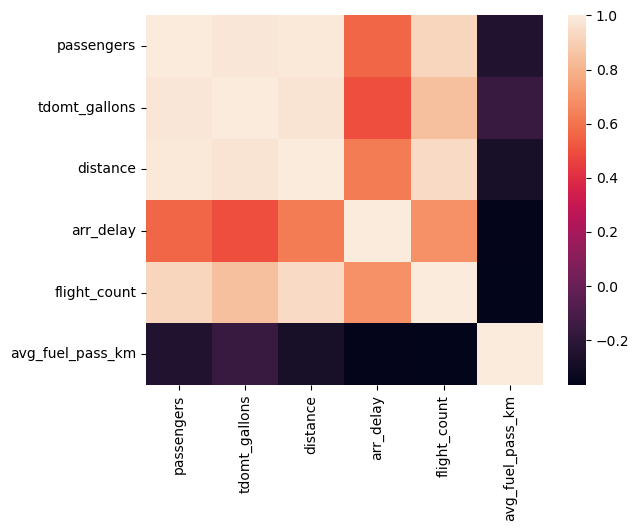

In [315]:
sns.heatmap(df_avg_fuel.corr());

No correlation seen between average fuel comsumption per passenger per km and bigger average delays.

In [322]:
# y = df_avg_fuel['arr_delay']
# X = df_avg_fuel['avg_fuel_pass_km']
# X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

# model = sm.OLS(y, X) #instantiate
# results = model.fit() #fit the model (this is where OLS is actually being run)
# print(results.summary())

In [ ]:
### QUESTION: do we also need to check out 'dep_delay', 'carrier_delay','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'?